# Reservoir Computing 

In [1]:
# Install our reservoir computing package for data generation only
import rescomp as rc
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import integrate, sparse
import math 
import networkx as nx
import itertools

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 5]

# Set seed for reproducibility
np.random.seed(1)

# Diversity Metric Imports
from math import comb

### Training Data

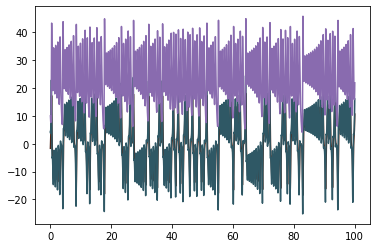

In [2]:
t, U = rc.orbit("lorenz", duration=100)
plt.rcParams["figure.figsize"] = [20, 5]
colors = rc.plot2d(t, U)

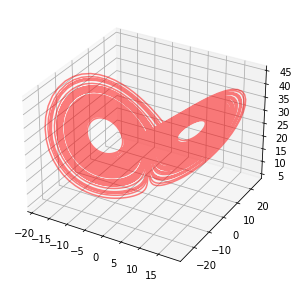

In [3]:
plt.rcParams["figure.figsize"] = [20, 5]
_ = rc.plot3d(U, color="red")

## Reservoir Computer Idea

### Reservoir Computer with Highly Connected Network

In [4]:
# Interpolate data
u = CubicSpline(t, U)
U_train = u(t[:9000])


# Parameters
n = 50
gamma = 5
sigma = 0.14
mean_degree = 1
density = mean_degree / n
alpha = 1e-6
rho = 50

# Directed Erdos-Renyi adjacency matrix
A = (np.random.rand(n, n) < density).astype(float)
# Fixed random matrix
W_in = np.random.rand(n, 3) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:9000])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[9000:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

### Reservoir Internal States

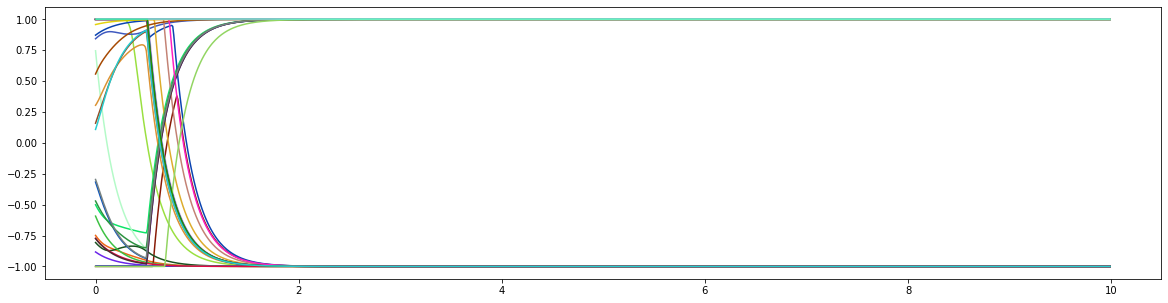

In [5]:
plt.rcParams["figure.figsize"] = [20, 5]
rc.plot2d(t[:1000], pred_states[:1000])
plt.show()

### Reservoir Prediction

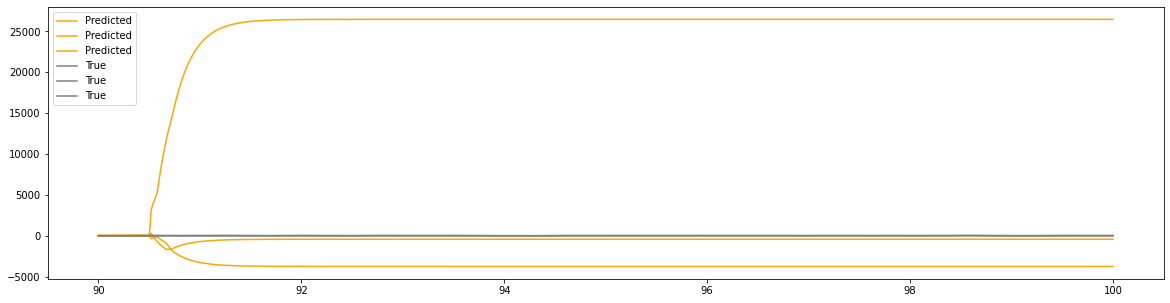

In [6]:
test_t = t[9000:]
plt.rcParams["figure.figsize"] = [20, 5]
plt.plot(test_t, U_pred.T, c="orange", label="Predicted");
plt.plot(test_t, u(test_t), c="gray", label="True");
plt.legend()
plt.show()

### Reservoir Attractor Reconstruction

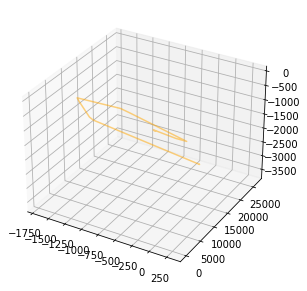

In [7]:
_ = rc.plot3d(U_pred.T, color="orange")

### Reservoir Computer with Zero Edges

In [8]:
# Interpolate data
u = CubicSpline(t, U)
U_train = u(t[:9000])


# Parameters
n = 50
gamma = 5
sigma = 0.14
alpha = 1e-6
rho = 50

# Adjacency matrix with zero edges
A = np.zeros((n, n))

######################################################
# The rest of the code is exactly the same as before #
######################################################

# Fixed random matrix
W_in = np.random.rand(n, 3) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:9000])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[9000:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

### Zero Edge Reservoir Internal States

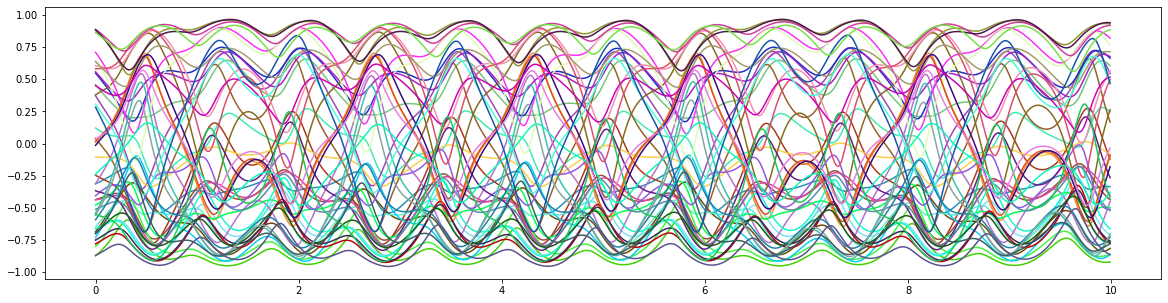

array([[0.25872171, 0.92163692, 0.70206946],
       [0.61893042, 0.27300884, 0.69584846],
       [0.25721475, 0.81645267, 0.01147246],
       [0.16653764, 0.55782899, 0.712281  ],
       [0.49248065, 0.8778095 , 0.97586994],
       [0.46427707, 0.76798698, 0.49477213],
       [0.66509878, 0.22487498, 0.10954172],
       [0.97900894, 0.81499466, 0.28538353],
       [0.58582838, 0.38007121, 0.17633804],
       [0.41883514, 0.29718779, 0.01662411],
       [0.38736831, 0.920913  , 0.82820026],
       [0.57407476, 0.31864686, 0.23126429],
       [0.95601958, 0.5646101 , 0.2176053 ],
       [0.24948205, 0.9595962 , 0.23881413],
       [0.10671409, 0.18396194, 0.76622481],
       [0.70876426, 0.43794192, 0.79380451],
       [0.51751269, 0.41359816, 0.11744194],
       [0.88391107, 0.27559321, 0.61626072],
       [0.98457978, 0.18941802, 0.96518799],
       [0.65271537, 0.1287316 , 0.77192715],
       [0.95177578, 0.56278055, 0.6885552 ],
       [0.02634788, 0.98907569, 0.31845712],
       [0.

In [9]:
plt.rcParams["figure.figsize"] = [20, 5]
rc.plot2d(t[:1000], pred_states[:1000])

### Zero Edge Reservoir Prediction

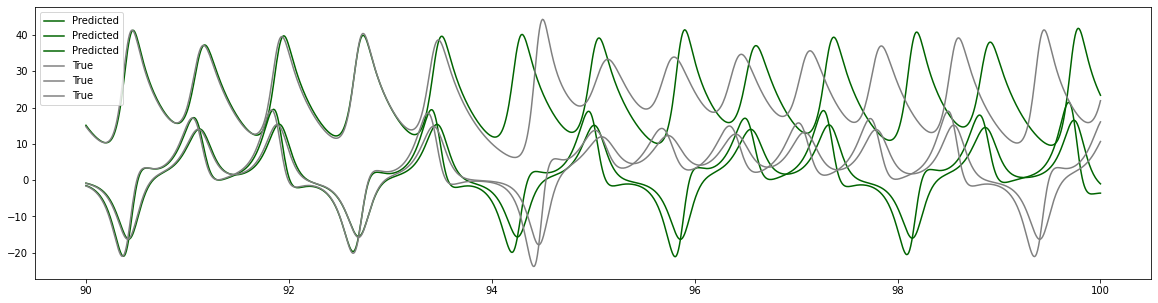

In [10]:
test_t = t[9000:]
plt.rcParams["figure.figsize"] = [20, 5]
plt.plot(test_t, U_pred.T, c="darkgreen", label="Predicted");
plt.plot(test_t, u(test_t), c="gray", label="True");
plt.legend()
plt.show()

### Zero Edge Reservoir Attractor Reconstruction

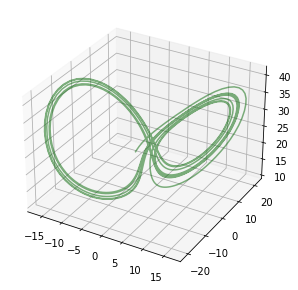

In [11]:
plt.rcParams["figure.figsize"] = [20, 5]
_ = rc.plot3d(U_pred.T, color="darkgreen")

### Explore Data

In [12]:
data_path = 'sleep-cassette-aggregate.npz'
data = np.load(data_path)
print(data.__dir__())

['_files', 'files', 'allow_pickle', 'pickle_kwargs', 'zip', 'f', 'fid', '__module__', '__doc__', '__init__', '__enter__', '__exit__', 'close', '__del__', '__iter__', '__len__', '__getitem__', 'iteritems', 'iterkeys', '__dict__', '__weakref__', '__abstractmethods__', '_abc_impl', '__slots__', 'get', '__contains__', 'keys', 'items', 'values', '__eq__', '__reversed__', '__hash__', '__subclasshook__', '__new__', '__repr__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__reduce__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '__class_getitem__']


In [13]:
train_patients = data['validate_patients']
train_patients

array(['SC4251', 'SC4252', 'SC4131', 'SC4321', 'SC4322', 'SC4481',
       'SC4482', 'SC4151', 'SC4152', 'SC4741', 'SC4742', 'SC4311',
       'SC4312', 'SC4201', 'SC4202', 'SC4591', 'SC4592', 'SC4571',
       'SC4572', 'SC4771', 'SC4772', 'SC4001', 'SC4002', 'SC4362',
       'SC4101', 'SC4102', 'SC4821', 'SC4822', 'SC4031', 'SC4032'],
      dtype='<U6')

In [14]:
labels = data['labels']
labels

array(['EEG FPZ-CZ-freq0', 'EEG FPZ-CZ-freq1', 'EEG FPZ-CZ-freq2',
       'EEG FPZ-CZ-freq3', 'EEG FPZ-CZ-freq4', 'EEG PZ-OZ-freq0',
       'EEG PZ-OZ-freq1', 'EEG PZ-OZ-freq2', 'EEG PZ-OZ-freq3',
       'EEG PZ-OZ-freq4', 'EOG HORIZONTAL-freq0', 'EOG HORIZONTAL-freq1',
       'EOG HORIZONTAL-freq2', 'EOG HORIZONTAL-freq3',
       'EOG HORIZONTAL-freq4', 'EMG SUBMENTAL-freq0',
       'EMG SUBMENTAL-freq1', 'EMG SUBMENTAL-freq2',
       'EMG SUBMENTAL-freq3', 'EMG SUBMENTAL-freq4',
       'RESP ORO-NASAL-mean', 'TEMP RECTAL-mean', '_HYPNO-mode'],
      dtype='<U20')

### Patient SC4111 in train data

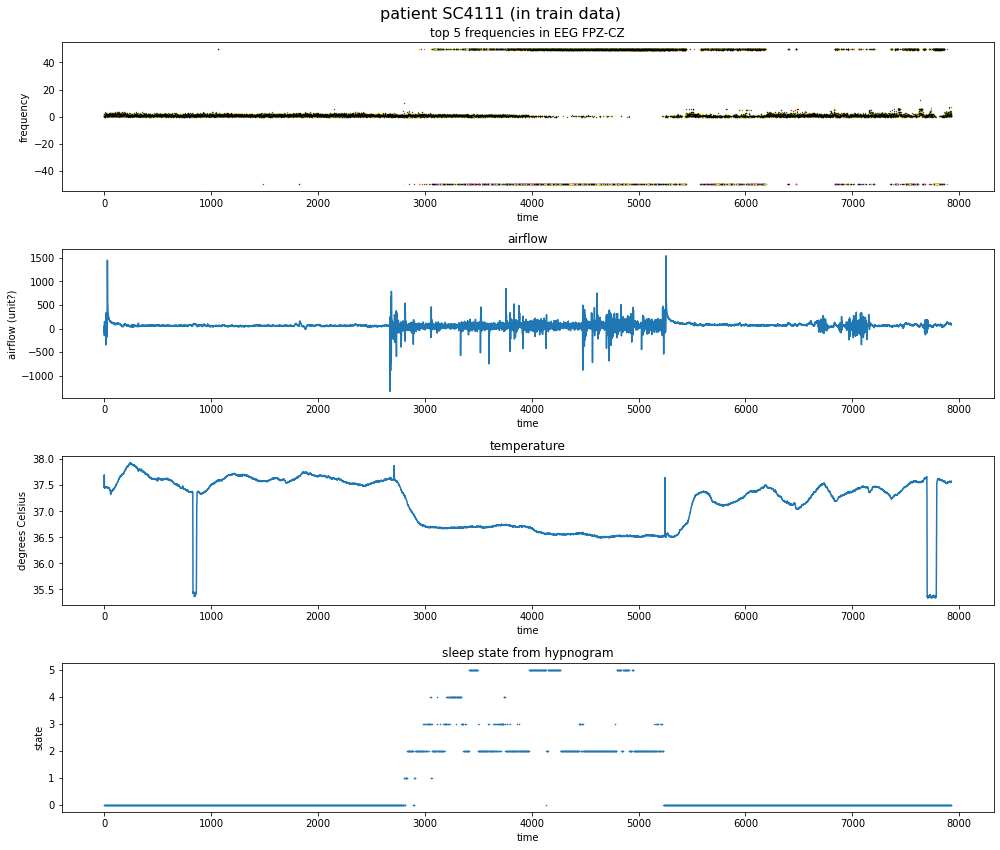

In [48]:
patient_name = 'SC4111'
patient = data[patient_name]

# Number of time steps, number of columns
T, C = patient.shape

fig, axs = plt.subplots(4, 1, figsize=(14, 12))

ax = axs[0]
ticks = range(T)
ax.scatter(ticks, patient[:, 0], s=0.1, color='blue')
ax.scatter(ticks, patient[:, 1], s=0.1, color='red')
ax.scatter(ticks, patient[:, 2], s=0.1, color='green')
ax.scatter(ticks, patient[:, 3], s=0.1, color='yellow')
ax.scatter(ticks, patient[:, 4], s=0.1, color='black')
ax.set_title(f'top 5 frequencies in {labels[0][:-6]}')
ax.set_ylabel('frequency')
ax.set_xlabel('time')

ax = axs[1]
ax.plot(patient[:, 20])
ax.set_title('airflow')
ax.set_ylabel('airflow (unit?)')
ax.set_xlabel('time')

ax = axs[2]
ax.plot(patient[:, 21])
ax.set_title('temperature')
ax.set_ylabel('degrees Celsius')
ax.set_xlabel('time')

ax = axs[3]
ax.scatter(range(T), patient[:, -1], s=0.1)
ax.set_title('sleep state from hypnogram')
ax.set_ylabel('state')
ax.set_xlabel('time')

fig.suptitle(f'patient {patient_name} (in train data)', fontsize=16)
fig.tight_layout()
fig.show()

In [49]:
"""Reservoir Computer on Patient SC4111"""
patient_name = 'SC4111'
patient = data[patient_name]

# Number of time steps, number of columns
T, C = patient.shape

# Analyze just the sleep time
sleep_start = np.argmax(patient[:, -1] > 0)
sleep_end = T - np.argmax(patient[:, -1][::-1] > 0)
patient_sleep = patient[sleep_start:sleep_end]
n = len(patient_sleep[:, -1])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)

# Time Series with first channel
u = CubicSpline(t, patient_sleep[:,:20])

U_train = u(t[:2000])

In [50]:
# Begin the Reservoir Computing

# Parameters
dim = 20
n = 50
gamma = 5
sigma = 0.14
alpha = 1e-6
rho = 50
mean_degree = 1
density = mean_degree / n

# Adjacency matrix with zero edges
A = np.zeros((n, n))
# A = (np.random.rand(n, n) < density).astype(float)

######################################################
# The rest of the code is exactly the same as before #
######################################################

# Fixed random matrix
W_in = np.random.rand(n, dim) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:2000])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[2000:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

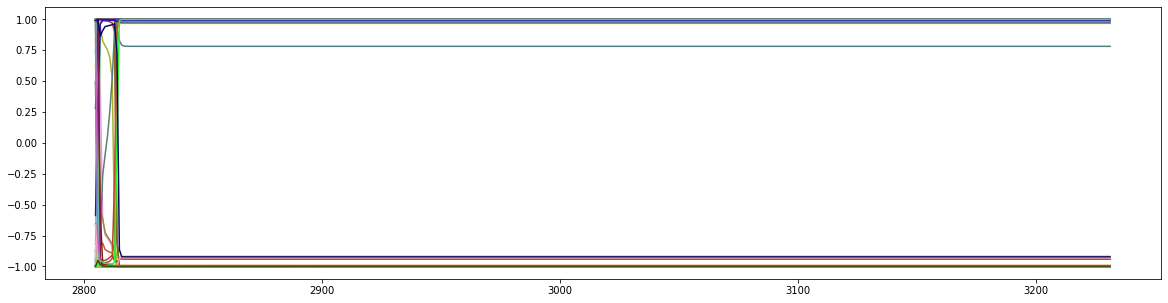

In [51]:
plt.rcParams["figure.figsize"] = [20, 5]
rc.plot2d(t[:427], pred_states)
plt.show()

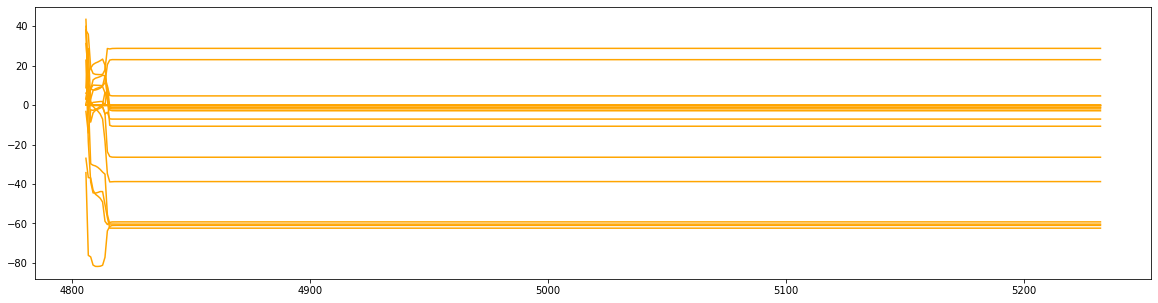

In [53]:
test_t = t[2000:]
plt.rcParams["figure.figsize"] = [20, 5]
plt.plot(test_t, U_pred.T, c="orange", label="Predicted")
# plt.plot(test_t, u(test_t), c="gray", label="True")
# plt.legend()
plt.show()

^^ Das nah gud